# Import

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from overcome_tomorrow.utils.data import *
from overcome_tomorrow.utils.preprocess import *
pd.set_option("display.max_columns", None)

# Load datas

In [3]:
garmin_df = merge_all_data("../raw_data/Wellness/", "../raw_data/Fitness/", "../raw_data/Aggregator/")

✅ ../raw_data/Wellness/ loaded
✅ Wellness cleaned
✅ ../raw_data/Fitness/ loaded
✅ Fitness cleaned


/home/ruben/code/Ruuuben06/overcome-tomorrow/overcome-tomorrow/overcome_tomorrow/utils/data.py:180: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_fitness_df["date"] = pd.to_datetime(clean_fitness_df["beginTimestamp"], unit="ms").dt.date
/home/ruben/code/Ruuuben06/overcome-tomorrow/overcome-tomorrow/overcome_tomorrow/utils/data.py:181: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_fitness_df["date"] = pd.to_datetime(clean_fitness_df["date"])
/home/ruben/code/Ruuuben06/overcome-tomorrow/overcome-t

✅ ../raw_data/Aggregator/ loaded
✅ Aggregator cleaned
✅ Datasets merged


In [4]:
activity_df = pd.read_csv("../raw_data/activities.csv")

In [5]:
garmin_df.head()

,start_sleep,end_sleep,deepSleepSeconds,lightSleepSeconds,remSleepSeconds,awakeSleepSeconds,qualityScore,beginTimestamp,activityTrainingLoad,activityType,aerobicTrainingEffect,aerobicTrainingEffectMessage,anaerobicTrainingEffect,anaerobicTrainingEffectMessage,avgBikeCadence,avgHr,avgPower,avgRunCadence,avgSpeed,calories,caloriesConsumed,distance,duration,maxHr,maxPower,maxRunCadence,maxSpeed,moderateIntensityMinutes,normPower,sportType,trainingEffectLabel,trainingStressScore,vigorousIntensityMinutes,totalKilocalories,activeKilocalories,totalDistanceMeters,wellnessDistanceMeters,highlyActiveSeconds,activeSeconds,floorsAscendedInMeters,floorsDescendedInMeters,restingHeartRate,minAvgHeartRate,maxAvgHeartRate,hydration_sweatLossInML,respiration_avgWakingRespirationValue,respiration_highestRespirationValue,respiration_lowestRespirationValue,bodyBattery_Highest,bodyBattery_Lowest,allDayStress_awake,allDayStress_asleep
calendarDate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-08-29,2019-08-28 20:30:00,2019-08-29 05:00:00,NaN,NaN,NaN,NaN,NaN,2019-08-29 19:23:03,5.244644,walking,0.5,NO_AEROBIC_BENEFIT_18,0.0,NO_ANAEROBIC_BENEFIT_0,NaN,81.000000,NaN,52.0,0.138505,506.99242,NaN,219000.0,1581175.0,96.0,NaN,59.0,0.1987,NaN,NaN,GENERIC,UNKNOWN,NaN,NaN,2752.0,771.0,16939.0,6590.0,2422.0,4390.0,46.723,56.536,57.0,50.0,101.0,NaN,NaN,NaN,NaN,69.0,45.0,18.0,11.0
2019-08-29,2019-08-28 20:30:00,2019-08-29 05:00:00,NaN,NaN,NaN,NaN,NaN,2019-08-29 17:41:54,2.278595,other,0.2,NO_AEROBIC_BENEFIT_18,0.0,NO_ANAEROBIC_BENEFIT_0,NaN,89.000000,NaN,10.0,0.000000,100.56048,NaN,0.0,651961.0,114.0,NaN,65.0,NaN,NaN,NaN,GENERIC,UNKNOWN,NaN,NaN,2752.0,771.0,16939.0,6590.0,2422.0,4390.0,46.723,56.536,57.0,50.0,101.0,NaN,NaN,NaN,NaN,69.0,45.0,18.0,11.0
2019-08-29,2019-08-28 20:30:00,2019-08-29 05:00:00,NaN,NaN,NaN,NaN,NaN,2019-08-29 09:39:26,NaN,running,NaN,NaN,NaN,NaN,NaN,153.998984,NaN,NaN,0.360247,2371.55132,NaN,1034991.0,2873000.0,168.0,NaN,NaN,258.6510,NaN,NaN,RUNNING,NaN,NaN,NaN,2752.0,771.0,16939.0,6590.0,2422.0,4390.0,46.723,56.536,57.0,50.0,101.0,NaN,NaN,NaN,NaN,69.0,45.0,18.0,11.0
2019-08-30,2019-08-29 21:12:00,2019-08-30 05:08:00,5340.0,17940.0,4920.0,360.0,NaN,2019-08-30 17:38:42,8.112671,strength_training,0.8,NO_AEROBIC_BENEFIT_18,0.0,NO_ANAEROBIC_BENEFIT_0,NaN,107.000000,NaN,NaN,0.000000,431.57206,NaN,0.0,1201245.0,131.0,NaN,NaN,NaN,NaN,NaN,GENERIC,UNKNOWN,NaN,NaN,2480.0,504.0,10934.0,10934.0,2306.0,7587.0,61.674,53.156,53.0,46.0,119.0,NaN,NaN,NaN,NaN,100.0,66.0,20.0,6.0
2019-08-30,2019-08-29 21:12:00,2019-08-30 05:08:00,5340.0,17940.0,4920.0,360.0,NaN,2019-08-30 17:19:21,1.880997,other,0.1,NO_AEROBIC_BENEFIT_18,0.0,NO_ANAEROBIC_BENEFIT_0,NaN,89.000000,NaN,6.0,0.000000,100.56048,NaN,0.0,647400.0,106.0,NaN,66.0,NaN,NaN,NaN,GENERIC,UNKNOWN,NaN,NaN,2480.0,504.0,10934.0,10934.0,2306.0,7587.0,61.674,53.156,53.0,46.0,119.0,NaN,NaN,NaN,NaN,100.0,66.0,20.0,6.0


In [6]:
activity_df.head()

,timestamp,total_anaerobic_training_effect,enhanced_avg_speed,avg_stroke_distance,total_training_effect,num_active_lengths,max_running_cadence,max_heart_rate,sub_sport,total_descent,start_time,total_distance,pool_length,178,total_calories,max_cadence,sport,188,avg_step_length,enhanced_max_speed,205,num_lengths,206,207,pool_length_unit,normalized_power,training_load_peak,total_ascent,avg_power,total_strokes,training_stress_score,avg_cadence,avg_heart_rate,max_power,activity_id
0,2024-02-25 16:48:13+00:00,0.0,1.234,NaN,0.2,NaN,NaN,111.0,generic,1.0,2024-02-25 16:20:54+00:00,2001.46,NaN,179.0,114.0,58.0,walking,0.0,NaN,2.146,NaN,NaN,NaN,NaN,NaN,NaN,3.143585,19.0,NaN,NaN,NaN,52.0,96.0,NaN,nicko64@hotmail.fr_237829993545
1,2022-11-08 07:39:34+00:00,0.0,7.023,NaN,0.6,NaN,NaN,132.0,gravel_cycling,20.0,2022-11-08 07:25:08+00:00,5084.37,NaN,78.0,120.0,103.0,cycling,0.0,NaN,10.600,100.0,NaN,97.0,97.0,NaN,165.0,9.253098,20.0,144.0,880.0,8.7,82.0,110.0,466.0,nicko64@hotmail.fr_161107489254
2,2020-01-16 12:18:52+00:00,0.3,4.197,NaN,4.6,NaN,95.0,179.0,generic,52.0,2020-01-16 11:18:54+00:00,14454.36,NaN,747.0,855.0,95.0,running,4.0,NaN,4.712,NaN,NaN,NaN,NaN,NaN,NaN,257.602173,62.0,NaN,NaN,NaN,92.0,166.0,NaN,nicko64@hotmail.fr_47505547526
3,2023-11-25 07:52:52+00:00,0.0,4.108,NaN,3.3,NaN,97.0,167.0,generic,34.0,2023-11-25 07:09:57+00:00,10367.07,NaN,700.0,639.0,97.0,running,2.0,1388.8,4.871,100.0,NaN,76.0,76.0,NaN,357.0,118.865219,35.0,354.0,NaN,NaN,88.0,147.0,516.0,nicko64@hotmail.fr_221724422608
4,2021-11-24 19:47:49+00:00,0.0,1.468,NaN,0.1,NaN,NaN,92.0,generic,13.0,2021-11-24 19:01:06+00:00,3953.49,NaN,263.0,103.0,76.0,walking,0.0,NaN,2.006,NaN,NaN,NaN,NaN,NaN,NaN,1.332031,25.0,NaN,NaN,NaN,54.0,70.0,NaN,nicko64@hotmail.fr_114450316357


In [7]:
preprocess_activity_df = preproc_activity(activity_df)


✅ Preprocess successful


In [8]:
preprocess_garmin_df = preproc_garmin_data(garmin_df)

✅ Preprocess successful


# Analyse 

## Sleep analyse

In [9]:
preprocess_garmin_df.head()

,knn_transformer__deepSleepSeconds,knn_transformer__lightSleepSeconds,knn_transformer__remSleepSeconds,knn_transformer__awakeSleepSeconds,knn_transformer__qualityScore,knn_transformer__activityTrainingLoad,knn_transformer__aerobicTrainingEffect,knn_transformer__anaerobicTrainingEffect,knn_transformer__avgBikeCadence,knn_transformer__avgHr,knn_transformer__avgPower,knn_transformer__avgRunCadence,knn_transformer__avgSpeed,knn_transformer__calories,knn_transformer__caloriesConsumed,knn_transformer__distance,knn_transformer__duration,knn_transformer__maxHr,knn_transformer__maxPower,knn_transformer__maxRunCadence,knn_transformer__maxSpeed,knn_transformer__moderateIntensityMinutes,knn_transformer__normPower,knn_transformer__trainingStressScore,knn_transformer__vigorousIntensityMinutes,knn_transformer__totalKilocalories,knn_transformer__activeKilocalories,knn_transformer__totalDistanceMeters,knn_transformer__wellnessDistanceMeters,knn_transformer__highlyActiveSeconds,knn_transformer__activeSeconds,knn_transformer__floorsAscendedInMeters,knn_transformer__floorsDescendedInMeters,knn_transformer__restingHeartRate,knn_transformer__minAvgHeartRate,knn_transformer__maxAvgHeartRate,knn_transformer__hydration_sweatLossInML,knn_transformer__respiration_avgWakingRespirationValue,knn_transformer__respiration_highestRespirationValue,knn_transformer__respiration_lowestRespirationValue,knn_transformer__bodyBattery_Highest,knn_transformer__bodyBattery_Lowest,knn_transformer__allDayStress_awake,knn_transformer__allDayStress_asleep,pipe_categorical__sportType_CYCLING,pipe_categorical__sportType_FITNESS_EQUIPMENT,pipe_categorical__sportType_GENERIC,pipe_categorical__sportType_HIKING,pipe_categorical__sportType_RUNNING,pipe_categorical__sportType_STEPS,pipe_categorical__sportType_SWIMMING,pipe_categorical__sportType_TRAINING,pipe_categorical__sportType_TRANSITION,pipe_categorical__trainingEffectLabel_AEROBIC_BASE,pipe_categorical__trainingEffectLabel_LACTATE_THRESHOLD,pipe_categorical__trainingEffectLabel_RECOVERY,pipe_categorical__trainingEffectLabel_SPEED,pipe_categorical__trainingEffectLabel_TEMPO,pipe_categorical__trainingEffectLabel_UNKNOWN,pipe_categorical__trainingEffectLabel_VO2MAX,cycle transform__start_sleep_sin,cycle transform__start_sleep_cos,cycle transform__end_sleep_sin,cycle transform__end_sleep_cos,cycle transform__beginTimestamp_sin,cycle transform__beginTimestamp_cos
calendarDate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-08-29,0.132812,-0.152344,0.700980,0.020833,-0.400,-0.344406,-0.571429,0.0,-2.340426,-0.857143,-1.577778,-0.181818,-0.053512,-0.483740,0.0,-0.194980,-0.554856,-1.045455,-1.580376,-1.095652,-0.226377,0.839286,-1.516129,-0.814836,-0.378378,-0.705882,-0.753086,-0.540381,-0.806047,-0.585385,-0.953871,-0.604049,-0.283705,3.75,2.75,-2.777778,-0.140665,-1.25,0.333333,-3.00,-1.473684,0.736842,-1.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.866025,0.500000,0.965926,0.258819,-0.965926,0.258819
2019-08-29,0.031250,0.371094,0.235294,0.041667,-0.400,-0.375987,-0.678571,0.0,-0.638298,-0.693878,0.482540,-1.272727,-0.287354,-0.615176,0.0,-0.314383,-0.836346,-0.636364,-0.102296,-0.886957,-0.329718,-0.017857,0.506452,-0.730140,-0.337838,-0.705882,-0.753086,-0.540381,-0.806047,-0.585385,-0.953871,-0.604049,-0.283705,3.75,2.75,-2.777778,-0.812020,-0.75,-0.250000,-3.25,-1.473684,0.736842,-1.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.866025,0.500000,0.965926,0.258819,-0.965926,-0.258819
2019-08-29,0.132812,-0.152344,0.700980,0.020833,-0.400,0.638791,0.348214,0.0,-0.170213,0.632632,1.111111,0.772727,0.320864,0.119241,0.0,0.249912,-0.163518,0.590909,0.697286,0.069565,343.734648,-0.160714,1.122581,0.025117,0.450450,-0.705882,-0.753086,-0.540381,-0.806047,-0.585385,-0.953871,-0.604049,-0.283705,3.75,2.75,-2.777778,0.405371,-1.25,0.333333,-3.00,-1.473684,0.736842,-1.2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.866025,0.500000,0.965

In [10]:
sleep_time = preprocess_garmin_df["knn_transformer__deepSleepSeconds"] + preprocess_garmin_df["knn_transformer__lightSleepSeconds"] + preprocess_garmin_df["knn_transformer__remSleepSeconds"] + preprocess_garmin_df["knn_transformer__awakeSleepSeconds"]

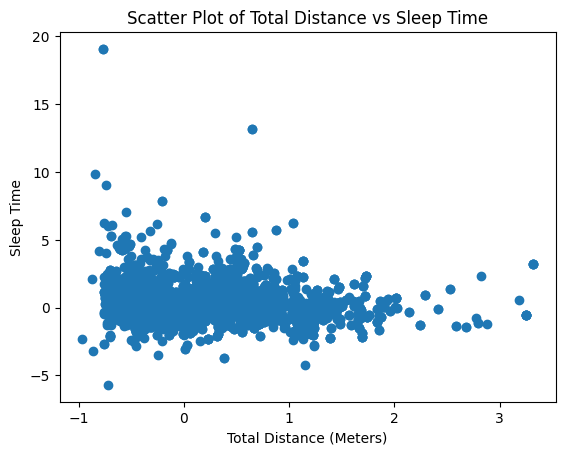

In [11]:
plt.scatter(preprocess_garmin_df["knn_transformer__totalDistanceMeters"], sleep_time,)
plt.xlabel('Total Distance (Meters)')  # Add label for x-axis
plt.ylabel('Sleep Time')  # Add label for y-axis
plt.title('Scatter Plot of Total Distance vs Sleep Time')  # Add title
plt.show()

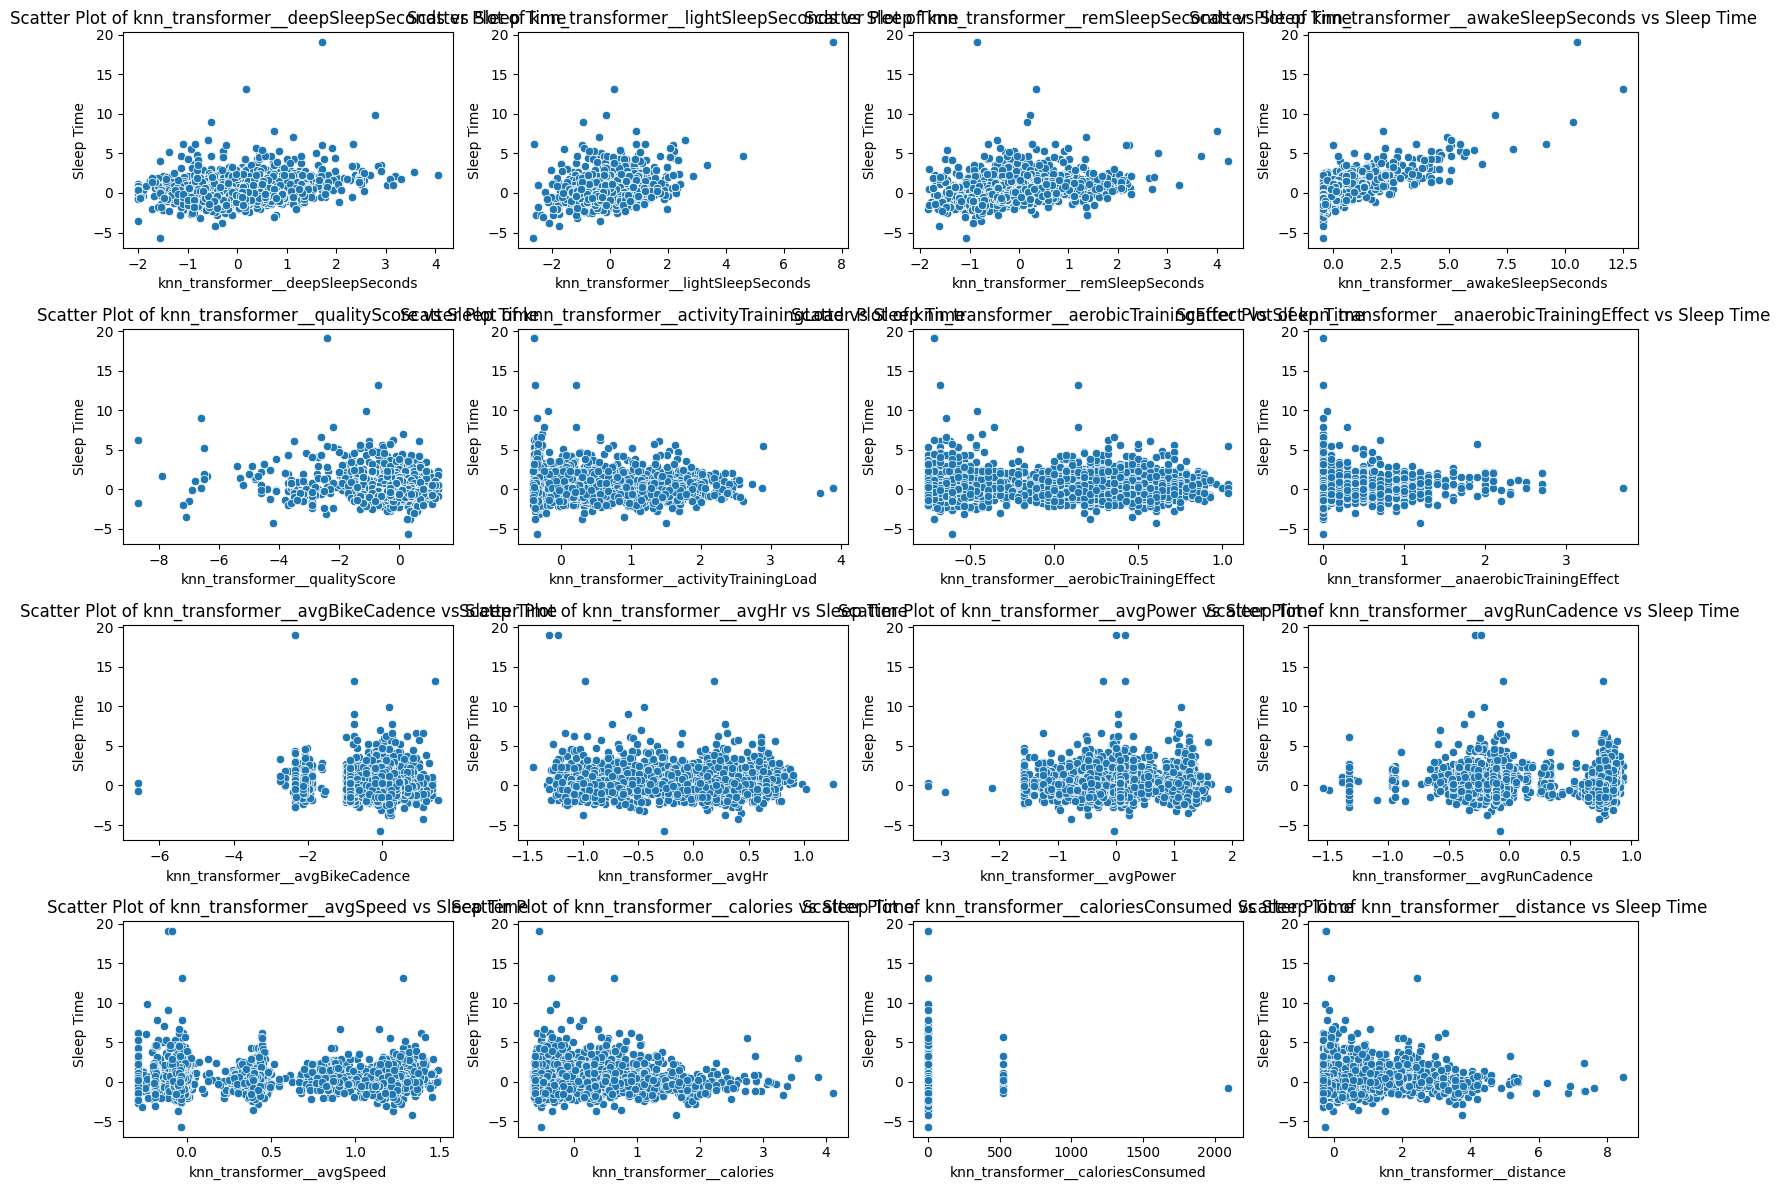

In [12]:
# Définir la taille de la figure
plt.figure(figsize=(16, 12))

# Limiter le nombre de colonnes à afficher dans la boucle
num_cols = min(len(preprocess_garmin_df.columns), 16)

# Boucle à travers chaque feature et tracer un scatter plot correspondant
for i in range(num_cols):
    feature = preprocess_garmin_df.columns[i]
    plt.subplot(4, 4, i+1)
    sns.scatterplot(x=preprocess_garmin_df[feature], y=sleep_time)
    plt.xlabel(feature)
    plt.ylabel('Sleep Time')
    plt.title(f'Scatter Plot of {feature} vs Sleep Time')

plt.tight_layout()
plt.show()

## Analyse number activity per month

In [13]:
activity_df['timestamp'] = pd.to_datetime(activity_df['timestamp'])
activity_df['date'] = activity_df['timestamp'].dt.date

In [14]:
activities_per_day = activity_df.groupby('date')['activity_id'].count()

In [167]:
def plot_activities_per_month(activity_df):
    """
    Plot the total number of activities per month.

    Parameters:
        activity_df (DataFrame): DataFrame containing activity data with a 'timestamp' column.
    """
    # Convert the 'timestamp' column to datetime format
    activity_df['timestamp'] = pd.to_datetime(activity_df['timestamp'])

    # Extract the month from the 'timestamp' column
    activity_df['month'] = activity_df['timestamp'].dt.to_period('M')

    # Group the data by month
    activities_per_month = activity_df.groupby('month').size()

    # Plot the graph
    plt.figure(figsize=(10, 6))
    activities_per_month.plot(kind='line', color='skyblue', marker='o')

    # Add title and axis labels
    plt.title('Total Activities per Month')
    plt.xlabel('Month')
    plt.ylabel('Number of Activities')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Add gridlines for better


/tmp/ipykernel_7029/4024339300.py:12: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  activity_df['month'] = activity_df['timestamp'].dt.to_period('M')


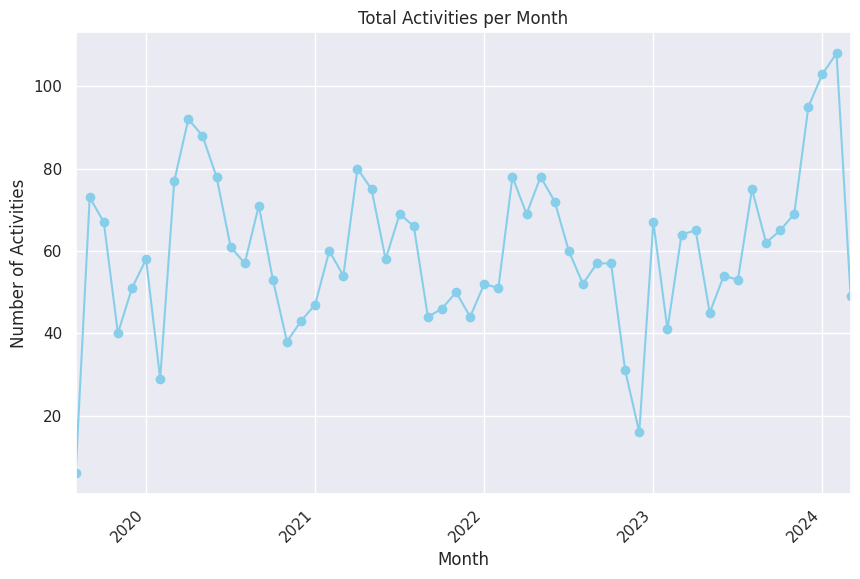

In [168]:
plot_activities_per_month(activity_df)

## Analyse distribution of sports

In [82]:
def visualize_sport_distribution(activity_df):
    """
    Visualize the distribution of sports based on the number of activities per sport.

    Parameters:
        activity_df (DataFrame): DataFrame containing activity data with a 'sport' column.
    """
    # Count the number of activities per sport
    sport_counts = activity_df['sport'].value_counts(ascending=False)

    # Visualization of the distribution of sports
    plt.figure(figsize=(10, 6))
    sns.countplot(data=activity_df, x='sport', order=sport_counts.index)
    plt.title('Distribution of Sports (Sorted in Descending Order)')
    plt.xlabel('Sport')
    plt.ylabel("Number of Activities")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming activity_df is your DataFrame containing activity data
# visualize_sport_distribution(activity_df)


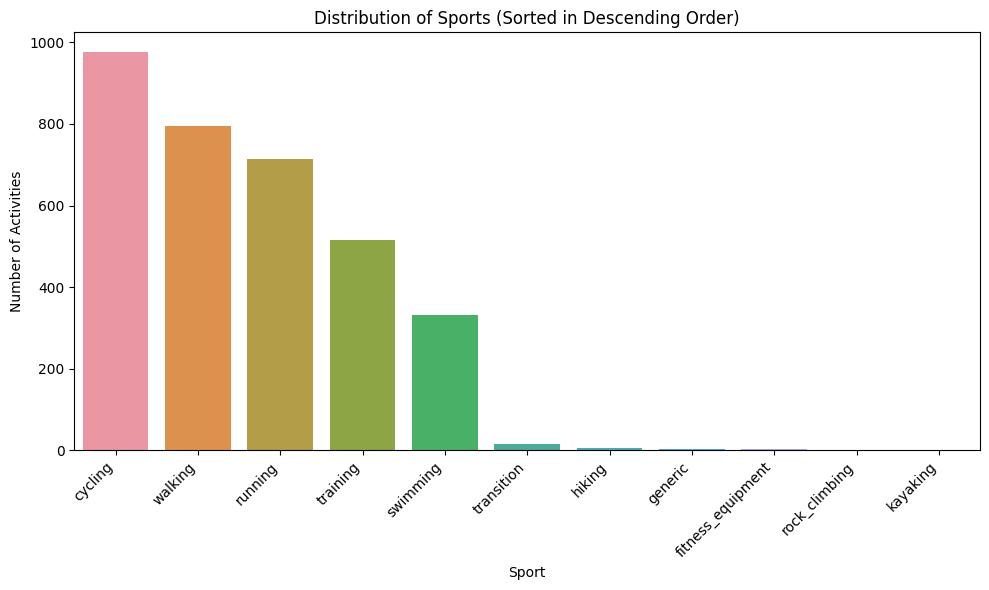

In [83]:
visualize_sport_distribution(activity_df)

## Analyse sport distribution over time

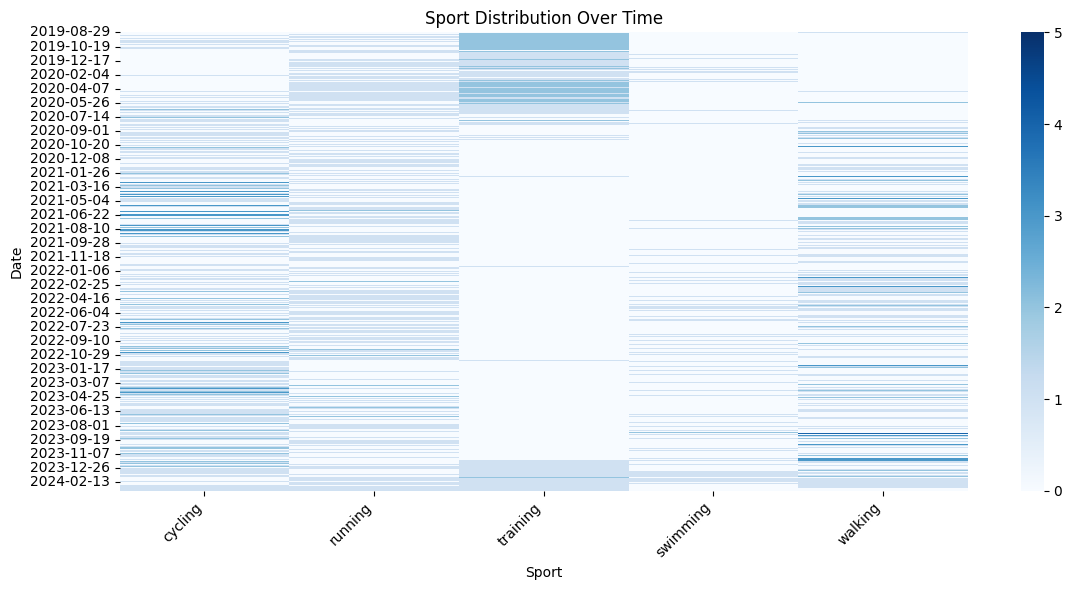

In [18]:
activity_df['date'] = activity_df['timestamp'].dt.date

# Count the number of activities per sport per date
sport_date_counts = activity_df.groupby(['date', 'sport']).size().unstack(fill_value=0)
sport_date_counts = sport_date_counts[["cycling", "running", "training", "swimming", "walking"]]
# Plotting the distribution of sports over time
plt.figure(figsize=(12, 6))
sns.heatmap(sport_date_counts, cmap='Blues')
plt.title('Sport Distribution Over Time')
plt.xlabel('Sport')
plt.ylabel('Date')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [19]:
preprocess_activity_df.head()

,knn_imputer__training_load_peak,knn_imputer__avg_heart_rate,knn_imputer__188,knn_imputer__total_distance,knn_imputer__enhanced_avg_speed,knn_imputer__total_descent,knn_imputer__total_calories,knn_imputer__178,knn_imputer__enhanced_max_speed,knn_imputer__total_ascent,knn_imputer__total_training_effect,knn_imputer__total_anaerobic_training_effect,knn_imputer__max_heart_rate,knn_imputer__206,knn_imputer__207,imputer 100__205,cat_encoder__sport_cycling,cat_encoder__sport_fitness_equipment,cat_encoder__sport_generic,cat_encoder__sport_hiking,cat_encoder__sport_kayaking,cat_encoder__sport_rock_climbing,cat_encoder__sport_running,cat_encoder__sport_swimming,cat_encoder__sport_training,cat_encoder__sport_transition,cat_encoder__sport_walking,cycle_encoder__timestamp_sin,cycle_encoder__timestamp_cos,cycle_encoder__start_time_sin,cycle_encoder__start_time_cos
0,-0.364840,-0.565657,-1.0,-0.212267,-0.085266,-0.329545,-0.506684,-0.567518,-0.210953,-0.194842,-0.714286,0.0,-0.704545,0.892086,0.863014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-8.660254e-01,-0.500000,-0.866025,-0.500000
1,-0.301589,-0.282828,-1.0,-0.049358,0.876922,-0.113636,-0.498663,-0.751825,0.894001,-0.183381,-0.571429,0.0,-0.227273,1.208633,1.164384,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.659258e-01,-0.258819,0.965926,-0.258819
2,2.269549,0.848485,1.0,0.445778,0.407213,0.250000,0.483957,0.468978,0.124428,0.297994,0.857143,0.3,0.840909,-0.273381,-0.356164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.224647e-16,-1.000000,0.258819,-0.965926
3,0.833217,0.464646,0.0,0.229794,0.392421,0.045455,0.195187,0.383212,0.145210,-0.011461,0.392857,0.0,0.568182,0.000000,0.013699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.659258e-01,-0.258819,0.965926,-0.258819
4,-0.383595,-1.090909,-1.0,-0.109116,-0.046372,-0.193182,-0.521390,-0.414234,-0.229251,-0.126074,-0.750000,0.0,-1.136364,0.633094,0.602740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-9.659258e-01,0.258819,-0.965926,0.258819


In [20]:
activity_df.head()

,timestamp,total_anaerobic_training_effect,enhanced_avg_speed,avg_stroke_distance,total_training_effect,num_active_lengths,max_running_cadence,max_heart_rate,sub_sport,total_descent,start_time,total_distance,pool_length,178,total_calories,max_cadence,sport,188,avg_step_length,enhanced_max_speed,205,num_lengths,206,207,pool_length_unit,normalized_power,training_load_peak,total_ascent,avg_power,total_strokes,training_stress_score,avg_cadence,avg_heart_rate,max_power,activity_id,date,month
0,2024-02-25 16:48:13+00:00,0.0,1.234,NaN,0.2,NaN,NaN,111.0,generic,1.0,2024-02-25 16:20:54+00:00,2001.46,NaN,179.0,114.0,58.0,walking,0.0,NaN,2.146,NaN,NaN,NaN,NaN,NaN,NaN,3.143585,19.0,NaN,NaN,NaN,52.0,96.0,NaN,nicko64@hotmail.fr_237829993545,2024-02-25,2024-02
1,2022-11-08 07:39:34+00:00,0.0,7.023,NaN,0.6,NaN,NaN,132.0,gravel_cycling,20.0,2022-11-08 07:25:08+00:00,5084.37,NaN,78.0,120.0,103.0,cycling,0.0,NaN,10.600,100.0,NaN,97.0,97.0,NaN,165.0,9.253098,20.0,144.0,880.0,8.7,82.0,110.0,466.0,nicko64@hotmail.fr_161107489254,2022-11-08,2022-11
2,2020-01-16 12:18:52+00:00,0.3,4.197,NaN,4.6,NaN,95.0,179.0,generic,52.0,2020-01-16 11:18:54+00:00,14454.36,NaN,747.0,855.0,95.0,running,4.0,NaN,4.712,NaN,NaN,NaN,NaN,NaN,NaN,257.602173,62.0,NaN,NaN,NaN,92.0,166.0,NaN,nicko64@hotmail.fr_47505547526,2020-01-16,2020-01
3,2023-11-25 07:52:52+00:00,0.0,4.108,NaN,3.3,NaN,97.0,167.0,generic,34.0,2023-11-25 07:09:57+00:00,10367.07,NaN,700.0,639.0,97.0,running,2.0,1388.8,4.871,100.0,NaN,76.0,76.0,NaN,357.0,118.865219,35.0,354.0,NaN,NaN,88.0,147.0,516.0,nicko64@hotmail.fr_221724422608,2023-11-25,2023-11
4,2021-11-24 19:47:49+00:00,0.0,1.468,NaN,0.1,NaN,NaN,92.0,generic,13.0,2021-11-24 19:01:06+00:00,3953.49,NaN,263.0,103.0,76.0,walking,0.0,NaN,2.006,NaN,NaN,NaN,NaN,NaN,NaN,1.332031,25.0,NaN,NaN,NaN,54.0,70.0,NaN,nicko64@hotmail.fr_114450316357,2021-11-24,2021-11


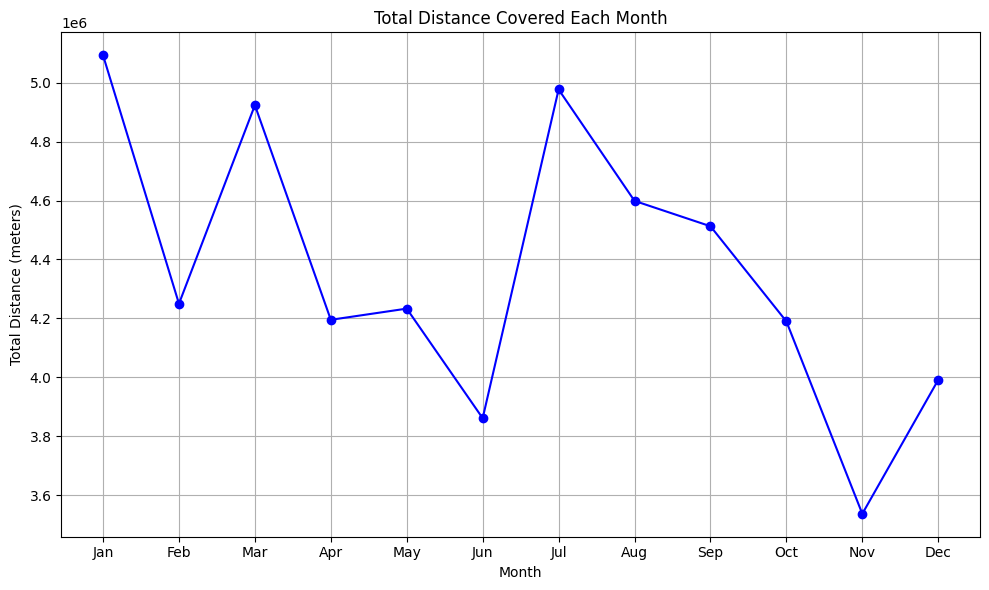

In [85]:
plot_monthly_distance(activity_df)

## Total distance covered each month over year

In [100]:
def plot_monthly_distance_over_years(activity_df):
    """
    Plot the total distance covered each month over multiple years.

    Parameters:
        activity_df (DataFrame): DataFrame containing activity data with 'timestamp' and 'total_distance' columns.
    """
    # Convert the 'timestamp' column to datetime format and extract month and year
    activity_df['timestamp'] = pd.to_datetime(activity_df['timestamp'])
    activity_df['month'] = activity_df['timestamp'].dt.month
    activity_df['year'] = activity_df['timestamp'].dt.year

    # Calculate the sum of total distance covered for each month over each year
    monthly_distance = activity_df.groupby(['year', 'month'])['total_distance'].sum()

    # Plot the line graph of total distance covered each month over multiple years
    plt.figure(figsize=(12, 6))
    for year in activity_df['year'].unique():
        monthly_distance[year].plot(kind='line', marker='o', label=str(year))

    plt.title('Total Distance Covered Each Month Over Years')
    plt.xlabel('Month')
    plt.ylabel('Total Distance (meters)')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.legend(title='Year')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming activity_df is your DataFrame containing activity data
# plot_monthly_distance_over_years(activity_df)


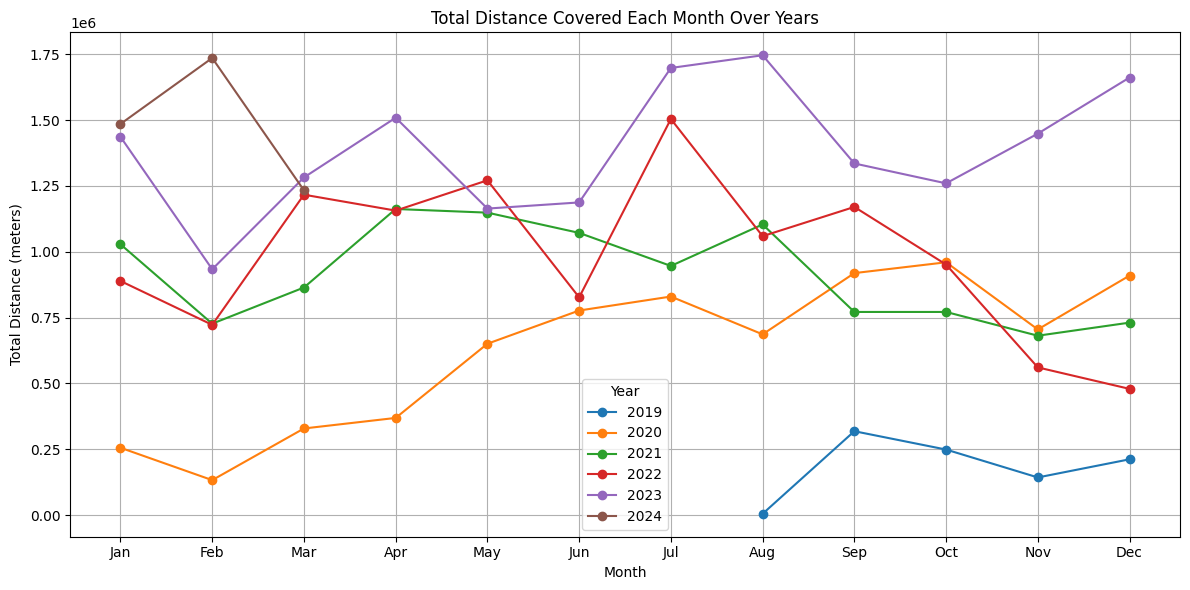

In [101]:
plot_monthly_distance_over_years(activity_df)

In [89]:
def plot_monthly_distance(year, month, activity_df):
    """
    Plot the total distance covered for each day of a specific month of a specific year.
    
    Parameters:
        year (int): The year.
        month (int): The month (1-12).
        activity_df (DataFrame): DataFrame containing activity data.
    """
    # Convert the 'start_time' column to datetime format
    activity_df['start_time'] = pd.to_datetime(activity_df['start_time'])
    
    # Filter the DataFrame for the specified year and month
    monthly_data = activity_df[(activity_df['start_time'].dt.year == year) & (activity_df['start_time'].dt.month == month)]
    
    # Aggregate the data on total distance covered for each day
    aggregated_data = monthly_data.groupby(monthly_data['start_time'].dt.day)['total_distance'].sum()
    
    # Plot the total distance covered for each day of the specified month and year
    plt.figure(figsize=(12, 6))
    plt.plot(aggregated_data.index, aggregated_data.values, marker='o', color='b')
    plt.title(f'Total Distance Covered in {pd.Timestamp(year=year, month=month, day=1).strftime("%B %Y")}')
    plt.xlabel('Day')
    plt.ylabel('Total Distance (meters)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage:
# plot_monthly_distance(2023, 6, activity_df)


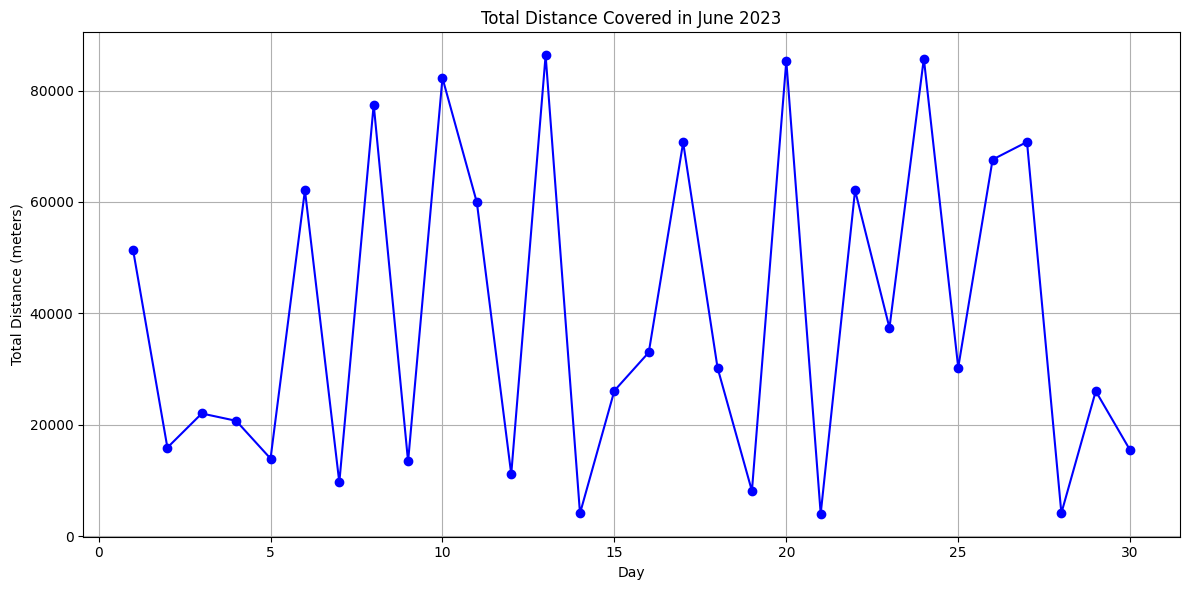

In [92]:
plot_monthly_distance(2023, 6, activity_df)

## Distance covered in X month in X year

In [27]:
activity_df.head()

,timestamp,total_anaerobic_training_effect,enhanced_avg_speed,avg_stroke_distance,total_training_effect,num_active_lengths,max_running_cadence,max_heart_rate,sub_sport,total_descent,start_time,total_distance,pool_length,178,total_calories,max_cadence,sport,188,avg_step_length,enhanced_max_speed,205,num_lengths,206,207,pool_length_unit,normalized_power,training_load_peak,total_ascent,avg_power,total_strokes,training_stress_score,avg_cadence,avg_heart_rate,max_power,activity_id,date,month,year
0,2024-02-25 16:48:13+00:00,0.0,1.234,NaN,0.2,NaN,NaN,111.0,generic,1.0,2024-02-25 16:20:54+00:00,2001.46,NaN,179.0,114.0,58.0,walking,0.0,NaN,2.146,NaN,NaN,NaN,NaN,NaN,NaN,3.143585,19.0,NaN,NaN,NaN,52.0,96.0,NaN,nicko64@hotmail.fr_237829993545,2024-02-25,2,2024
1,2022-11-08 07:39:34+00:00,0.0,7.023,NaN,0.6,NaN,NaN,132.0,gravel_cycling,20.0,2022-11-08 07:25:08+00:00,5084.37,NaN,78.0,120.0,103.0,cycling,0.0,NaN,10.600,100.0,NaN,97.0,97.0,NaN,165.0,9.253098,20.0,144.0,880.0,8.7,82.0,110.0,466.0,nicko64@hotmail.fr_161107489254,2022-11-08,11,2022
2,2020-01-16 12:18:52+00:00,0.3,4.197,NaN,4.6,NaN,95.0,179.0,generic,52.0,2020-01-16 11:18:54+00:00,14454.36,NaN,747.0,855.0,95.0,running,4.0,NaN,4.712,NaN,NaN,NaN,NaN,NaN,NaN,257.602173,62.0,NaN,NaN,NaN,92.0,166.0,NaN,nicko64@hotmail.fr_47505547526,2020-01-16,1,2020
3,2023-11-25 07:52:52+00:00,0.0,4.108,NaN,3.3,NaN,97.0,167.0,generic,34.0,2023-11-25 07:09:57+00:00,10367.07,NaN,700.0,639.0,97.0,running,2.0,1388.8,4.871,100.0,NaN,76.0,76.0,NaN,357.0,118.865219,35.0,354.0,NaN,NaN,88.0,147.0,516.0,nicko64@hotmail.fr_221724422608,2023-11-25,11,2023
4,2021-11-24 19:47:49+00:00,0.0,1.468,NaN,0.1,NaN,NaN,92.0,generic,13.0,2021-11-24 19:01:06+00:00,3953.49,NaN,263.0,103.0,76.0,walking,0.0,NaN,2.006,NaN,NaN,NaN,NaN,NaN,NaN,1.332031,25.0,NaN,NaN,NaN,54.0,70.0,NaN,nicko64@hotmail.fr_114450316357,2021-11-24,11,2021


## Average Cadence vs Average Speed

In [94]:
def plot_scatter_average_cadence_vs_speed(activity_df):
    """
    Create a scatter plot of average cadence vs average speed colored by sport.

    Parameters:
        activity_df (DataFrame): DataFrame containing activity data with 'avg_cadence', 'enhanced_avg_speed', and 'sport' columns.
    """
    # Extract columns of interest
    cadence = activity_df['avg_cadence']
    speed = activity_df['enhanced_avg_speed']
    sport = activity_df["sport"]

    # Create a scatter plot
    plt.figure(figsize=(10, 6))

    # Loop through each unique sport to color points based on sport
    sports = activity_df['sport'].unique()
    for s in sports:
        plt.scatter(cadence[activity_df['sport'] == s], 
                    speed[activity_df['sport'] == s], 
                    alpha=0.5, label=s)

    # Add labels and a title
    plt.title('Scatter Plot: Average Cadence vs Average Speed')
    plt.xlabel('Average Cadence')
    plt.ylabel('Average Speed')
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()

# Example usage:
# Assuming activity_df is your DataFrame containing activity data
# plot_scatter_average_cadence_vs_speed(activity_df)

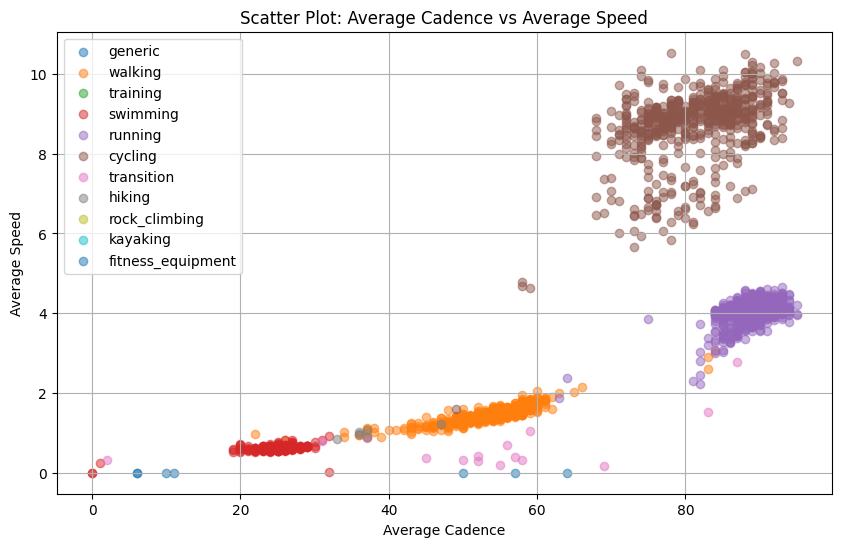

In [95]:
plot_scatter_average_cadence_vs_speed(activity_df)

## Monthly Calorie Expenditure and Distance Covered

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_monthly_calorie_and_distance(activity_df):
    """
    Create bar plot for monthly calorie expenditure and line plot for monthly distance,
    with a legend to differentiate between the two.

    Parameters:
        activity_df (DataFrame): DataFrame containing activity data with 'month', 'total_calories', and 'total_distance' columns.
    """
    # Assuming the data is already grouped by month and the total calories are summed up
    # If not, you may need to perform a groupby operation to aggregate the total calories by month
    monthly_calories = activity_df.groupby('month')['total_calories'].sum()

    # Extracting months and total calories
    months = monthly_calories.index
    total_calories = monthly_calories.values

    # Convert total distance from meters to kilometers
    activity_df['total_distance_km'] = activity_df['total_distance'] / 1000

    # Creating a bar plot for total calorie expenditure per month
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax1.bar(months, total_calories, color='skyblue')
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Total Calories', color='skyblue')
    ax1.tick_params(axis='y', labelcolor='skyblue')
    ax1.set_xticks(months)

    # Plotting the line plot for total distance covered per month on the same figure
    ax2 = ax1.twinx()
    ax2.plot(months, activity_df.groupby('month')['total_distance_km'].sum(), marker='o', color='orange')
    ax2.set_ylabel('Total Distance (km)', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

    # Adding legend and title
    plt.title('Monthly Calorie Expenditure and Distance Covered')
    plt.xticks(months, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

    # Adding legend
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, ['Calories', 'Distance'], loc='upper left')

    # Display the plot
    plt.grid(True)
    plt.show()

# Example usage:
# Assuming activity_df is your DataFrame containing activity data
# plot_monthly_calorie_and_distance(activity_df)

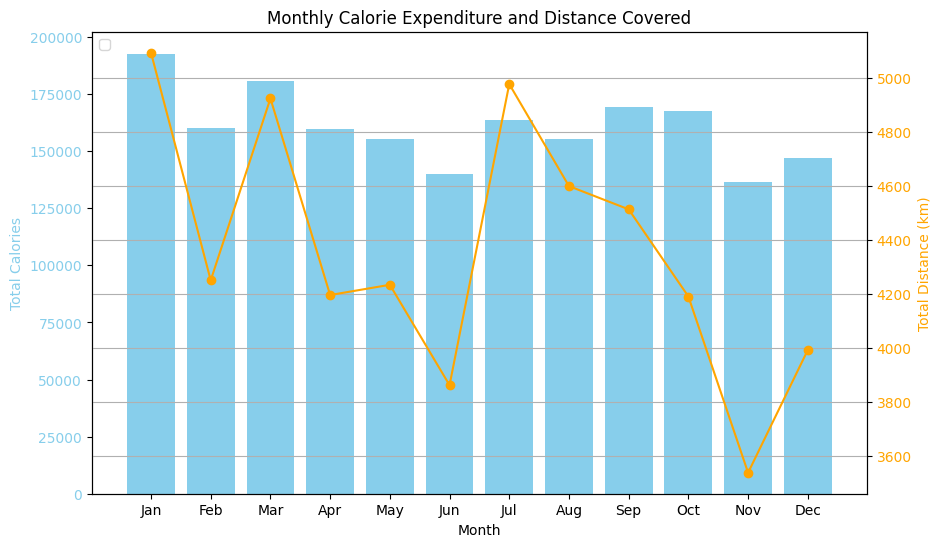

In [109]:
plot_monthly_calorie_and_distance(activity_df)

## Evolution of average speed over time

In [113]:
def plot_average_speed_over_time(activity_df):
    """
    Create a line plot showing the evolution of average speed over time.

    Parameters:
        activity_df (DataFrame): DataFrame containing activity data with 'timestamp' and 'enhanced_avg_speed' columns.
    """
    # Convert the 'timestamp' column to datetime format if not already done
    activity_df['timestamp'] = pd.to_datetime(activity_df['timestamp'])

    # Sort the data by timestamp
    activity_df.sort_values(by='timestamp', inplace=True)

    # Create the line plot
    plt.figure(figsize=(10, 6))
    plt.plot(activity_df['timestamp'], activity_df['enhanced_avg_speed'], color='blue')

    # Add labels and title
    plt.title('Evolution of Average Speed over Time')
    plt.xlabel('Date')
    plt.ylabel('Average Speed')
    plt.grid(True)

    # Display the plot
    plt.show()

# Example usage:
# Assuming activity_df is your DataFrame containing activity data
# plot_average_speed_over_time(activity_df)


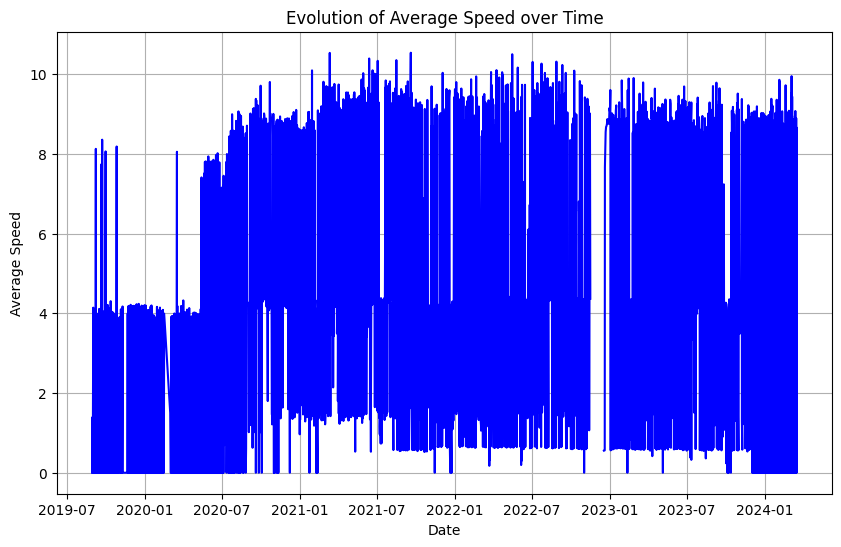

In [114]:
plot_average_speed_over_time(activity_df)

## distance travelled by activity

In [124]:
activity_df.tail()

,timestamp,total_anaerobic_training_effect,enhanced_avg_speed,avg_stroke_distance,total_training_effect,num_active_lengths,max_running_cadence,max_heart_rate,sub_sport,total_descent,start_time,total_distance,pool_length,178,total_calories,max_cadence,sport,188,avg_step_length,enhanced_max_speed,205,num_lengths,206,207,pool_length_unit,normalized_power,training_load_peak,total_ascent,avg_power,total_strokes,training_stress_score,avg_cadence,avg_heart_rate,max_power,activity_id,date,month,year,distance_km,total_distance_km
2699,2024-03-14 11:32:43+00:00,0.0,0.000,NaN,0.0,NaN,NaN,89.0,strength_training,NaN,2024-03-14 11:25:57+00:00,0.00,NaN,53.0,21.0,NaN,training,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.686172,NaN,NaN,NaN,NaN,NaN,75.0,NaN,nicko64@hotmail.fr_241188067403,2024-03-14,3,2024,0.00000,0.00000
2551,2024-03-14 18:32:31+00:00,0.0,3.955,NaN,3.3,NaN,90.0,153.0,generic,52.0,2024-03-14 17:21:40+00:00,16012.68,NaN,1124.0,929.0,90.0,running,2.0,1404.1,4.283,94.0,NaN,71.0,71.0,NaN,339.0,116.148071,56.0,338.0,NaN,NaN,84.0,142.0,413.0,nicko64@hotmail.fr_241246052903,2024-03-14,3,2024,16.01268,16.01268
2825,2024-03-15 07:45:23+00:00,0.0,8.657,NaN,3.5,NaN,NaN,142.0,gravel_cycling,298.0,2024-03-15 05:25:09+00:00,72616.84,NaN,1371.0,2019.0,104.0,cycling,3.0,NaN,11.915,95.0,NaN,67.0,67.0,NaN,221.0,144.809784,296.0,218.0,10737.0,147.4,77.0,127.0,418.0,nicko64@hotmail.fr_241349530713,2024-03-15,3,2024,72.61684,72.61684
2984,2024-03-15 11:05:33+00:00,0.0,0.000,NaN,0.0,NaN,NaN,90.0,strength_training,NaN,2024-03-15 10:57:38+00:00,0.00,NaN,39.0,19.0,NaN,training,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.604935,NaN,NaN,NaN,NaN,NaN,75.0,NaN,nicko64@hotmail.fr_241374800667,2024-03-15,3,2024,0.00000,0.00000
1149,2024-03-15 11:26:17+00:00,0.0,3.521,NaN,1.5,NaN,88.0,139.0,generic,13.0,2024-03-15 11:14:42+00:00,2337.73,NaN,184.0,140.0,88.0,running,1.0,1265.6,4.749,95.0,NaN,91.0,91.0,NaN,323.0,22.125320,16.0,319.0,NaN,NaN,84.0,126.0,442.0,nicko64@hotmail.fr_241377639543,2024-03-15,3,2024,2.33773,2.33773


In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def analyze_last_activities(activity_df, num_days, sport_type):
    """
    Analyze the distance and average heart rate for the last X days of a specific sport type.

    Parameters:
        activity_df (DataFrame): DataFrame containing activity data with 'sport', 'total_distance', 'avg_heart_rate', and 'date' columns.
        num_days (int): Number of last days to consider for the specific sport type.
        sport_type (str): Type of sport to include in the analysis.

    Returns:
        None (displays a barplot)
    """
    # Filter the DataFrame to keep only the last X days' activities for the specific sport type
    last_activities = activity_df[activity_df['sport'] == sport_type].tail(num_days)

    # Convert total distance from meters to kilometers
    last_activities['total_distance_km'] = last_activities['total_distance'] / 1000

    # Create an index range for the last X days
    days_range = np.arange(1, num_days + 1)

    # Plotting the barplot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=last_activities, x=days_range, y='total_distance_km', color='skyblue', label='Total Distance')
    ax2 = plt.twinx()
    sns.lineplot(data=last_activities, x=days_range, y='avg_heart_rate', marker='o', color='orange', ax=ax2, label='Average Heart Rate')

    # Adding labels and title
    plt.title(f'Analysis of Last {num_days} Days of {sport_type.capitalize()} Activities')
    plt.xlabel('Days')
    plt.ylabel('Total Distance (kilometers)', color='skyblue')
    ax2.set_ylabel('Average Heart Rate', color='orange')

    # Displaying the legend
    plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1))

    # Show the plot
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Example usage:
# analyze_last_activities(activity_df, 20, "running")


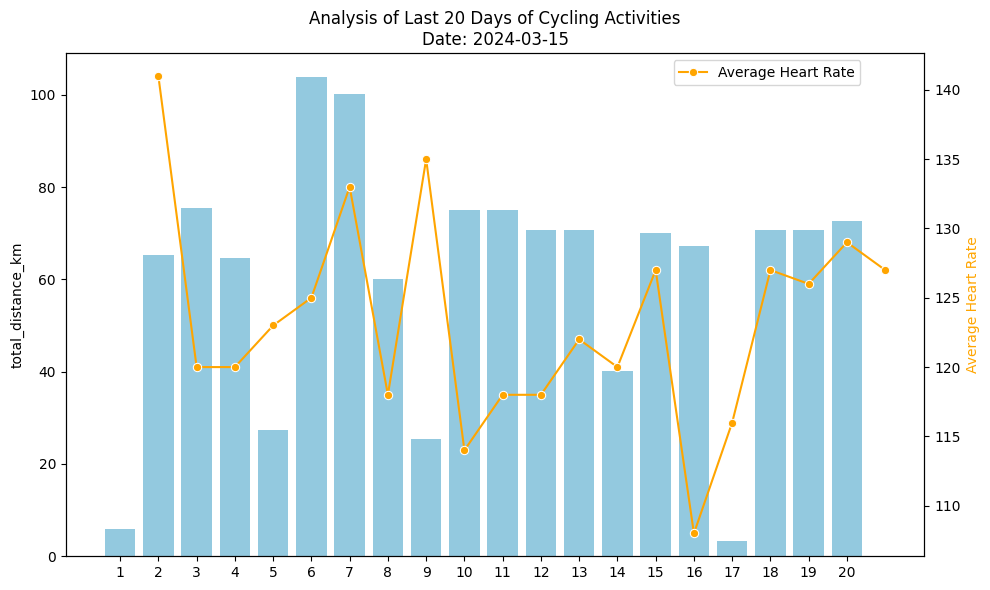

In [140]:
analyze_last_activities(activity_df, 20, "cycling")

In [142]:
activity_df.tail()

,timestamp,total_anaerobic_training_effect,enhanced_avg_speed,avg_stroke_distance,total_training_effect,num_active_lengths,max_running_cadence,max_heart_rate,sub_sport,total_descent,start_time,total_distance,pool_length,178,total_calories,max_cadence,sport,188,avg_step_length,enhanced_max_speed,205,num_lengths,206,207,pool_length_unit,normalized_power,training_load_peak,total_ascent,avg_power,total_strokes,training_stress_score,avg_cadence,avg_heart_rate,max_power,activity_id,date,month,year,distance_km,total_distance_km
2699,2024-03-14 11:32:43+00:00,0.0,0.000,NaN,0.0,NaN,NaN,89.0,strength_training,NaN,2024-03-14 11:25:57+00:00,0.00,NaN,53.0,21.0,NaN,training,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.686172,NaN,NaN,NaN,NaN,NaN,75.0,NaN,nicko64@hotmail.fr_241188067403,2024-03-14,3,2024,0.00000,0.00000
2551,2024-03-14 18:32:31+00:00,0.0,3.955,NaN,3.3,NaN,90.0,153.0,generic,52.0,2024-03-14 17:21:40+00:00,16012.68,NaN,1124.0,929.0,90.0,running,2.0,1404.1,4.283,94.0,NaN,71.0,71.0,NaN,339.0,116.148071,56.0,338.0,NaN,NaN,84.0,142.0,413.0,nicko64@hotmail.fr_241246052903,2024-03-14,3,2024,16.01268,16.01268
2825,2024-03-15 07:45:23+00:00,0.0,8.657,NaN,3.5,NaN,NaN,142.0,gravel_cycling,298.0,2024-03-15 05:25:09+00:00,72616.84,NaN,1371.0,2019.0,104.0,cycling,3.0,NaN,11.915,95.0,NaN,67.0,67.0,NaN,221.0,144.809784,296.0,218.0,10737.0,147.4,77.0,127.0,418.0,nicko64@hotmail.fr_241349530713,2024-03-15,3,2024,72.61684,72.61684
2984,2024-03-15 11:05:33+00:00,0.0,0.000,NaN,0.0,NaN,NaN,90.0,strength_training,NaN,2024-03-15 10:57:38+00:00,0.00,NaN,39.0,19.0,NaN,training,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.604935,NaN,NaN,NaN,NaN,NaN,75.0,NaN,nicko64@hotmail.fr_241374800667,2024-03-15,3,2024,0.00000,0.00000
1149,2024-03-15 11:26:17+00:00,0.0,3.521,NaN,1.5,NaN,88.0,139.0,generic,13.0,2024-03-15 11:14:42+00:00,2337.73,NaN,184.0,140.0,88.0,running,1.0,1265.6,4.749,95.0,NaN,91.0,91.0,NaN,323.0,22.125320,16.0,319.0,NaN,NaN,84.0,126.0,442.0,nicko64@hotmail.fr_241377639543,2024-03-15,3,2024,2.33773,2.33773


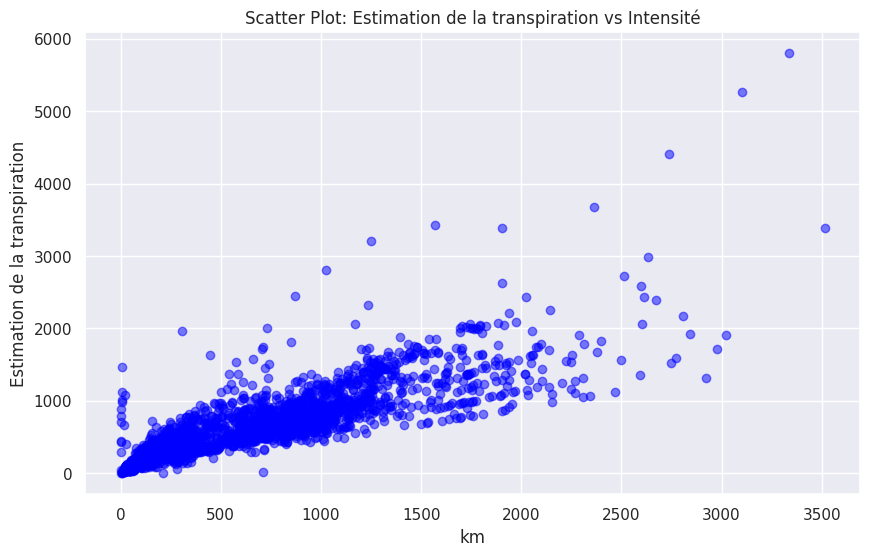

In [153]:
import matplotlib.pyplot as plt

# Extraire les données de la colonne 178 (estimation de la transpiration) et de la colonne 188 (intensité)
transpiration = activity_df['178']
intensite = activity_df['total_calories']

# Créer un scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(intensite, transpiration, alpha=0.5, color='blue')

# Ajouter des labels et un titre
plt.title('Scatter Plot: Estimation de la transpiration vs Intensité')
plt.xlabel('km')
plt.ylabel('Estimation de la transpiration')

# Afficher la visualisation
plt.grid(True)
plt.show()


In [151]:
activity_df[activity_df["188"] > 5]

,timestamp,total_anaerobic_training_effect,enhanced_avg_speed,avg_stroke_distance,total_training_effect,num_active_lengths,max_running_cadence,max_heart_rate,sub_sport,total_descent,start_time,total_distance,pool_length,178,total_calories,max_cadence,sport,188,avg_step_length,enhanced_max_speed,205,num_lengths,206,207,pool_length_unit,normalized_power,training_load_peak,total_ascent,avg_power,total_strokes,training_stress_score,avg_cadence,avg_heart_rate,max_power,activity_id,date,month,year,distance_km,total_distance_km
304,2019-09-22 09:52:11+00:00,2.5,2.786,NaN,3.2,NaN,NaN,183.0,generic,1.0,2019-09-22 09:50:42+00:00,247.52,NaN,NaN,16.0,94.0,transition,7.0,NaN,3.956,NaN,NaN,NaN,NaN,NaN,NaN,157.335953,0.0,NaN,NaN,NaN,87.0,171.0,NaN,nicko64@hotmail.fr_41040810551,2019-09-22,9,2019,0.24752,0.24752
1836,2022-03-26 11:39:38+00:00,2.0,10.053,NaN,2.8,NaN,NaN,159.0,gravel_cycling,219.0,2022-03-26 10:06:28+00:00,55658.89,NaN,873.0,970.0,123.0,cycling,7.0,NaN,13.567,NaN,NaN,NaN,NaN,NaN,NaN,100.906479,220.0,NaN,8086.0,NaN,88.0,140.0,NaN,nicko64@hotmail.fr_130074588477,2022-03-26,3,2022,55.65889,55.65889


In [162]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Créer une figure et un axe
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# Créer une carte en projection orthographique (vue en perspective)
m = Basemap(projection='ortho', lat_0=0, lon_0=0)

# Tracer le globe
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='green', lake_color='lightblue')

# Coordonnées des points sur le globe (latitudes et longitudes)
# Notez que ces coordonnées doivent être normalisées (entre -180 et 180 pour les longitudes et entre -90 et 90 pour les latitudes)
lats = [0, 30, 60, 90]
lons = [0, 90, 180, -90]

# Tracer la distance parcourue
distance = 10000  # Remplacez ceci par la distance totale parcourue
for lat, lon in zip(lats, lons):
    x, y = m(lon, lat)
    m.plot(x, y, 'ro', markersize=distance / 100000)  # Ajustez la taille des points en fonction de la distance parcourue

# Titre et affichage
plt.title('Tracé de la distance parcourue sur le globe')
plt.show()


ModuleNotFoundError: No module named 'mpl_toolkits.basemap'